# Exercise 6.4 Machine Learning, Part 1

This script contains the following:

Section 1: Importing Libraries and Data

Section 2: Data Cleaning

Section 3: Data Prep for Regression Analysis

Section 4: Regression Analysis

Section 5: Thoughts on Model Performance

Section 6: Saving the Data

## Section 1: Importing Libraries and Data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Loading the data
path = 'C:/Users/gav/Documents/Career Foundry Data Analytics/Section 6 - Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_csv(os.path.join(path, 'Project Docs', '02 Data', 'Prepared Data', 'cleaned_house_data.csv'), index_col = False)

In [27]:
# This should let us see graphs without calling them
%matplotlib inline

## Section 2: Data Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'status', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'zip_code', 'house_size', 'price'],
      dtype='object')

In [6]:
# Dropping the unnamed column
df = df.drop(columns = ['Unnamed: 0'])

In [7]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'price'],
      dtype='object')

In [8]:
df.head

<bound method NDFrame.head of           status  bed  bath  acre_lot           city          state  zip_code  \
0       for_sale  2.0   1.0      0.34         Agawam  Massachusetts    1001.0   
1       for_sale  2.0   2.0      0.00         Agawam  Massachusetts    1001.0   
2       for_sale  2.0   2.0      0.00         Agawam  Massachusetts    1001.0   
3       for_sale  2.0   2.0      0.00         Agawam  Massachusetts    1001.0   
4       for_sale  3.0   1.0      0.46         Agawam  Massachusetts    1001.0   
...          ...  ...   ...       ...            ...            ...       ...   
753011  for_sale  2.0   2.0      0.00  New York City       New York   10463.0   
753012  for_sale  2.0   2.0      0.00  New York City       New York   10463.0   
753013  for_sale  2.0   2.0      0.00          Bronx       New York   10463.0   
753014  for_sale  3.0   2.0      0.00          Bronx       New York   10463.0   
753015  for_sale  3.0   3.0      0.00  New York City       New York   10463.0  

In [10]:
# Upon relection, the status column may be useless, but let's check
df['status'].value_counts(dropna = False)

for_sale          751423
ready_to_build      1593
Name: status, dtype: int64

I supsect that the ready_to_build locations will only weigh down the analysis, so let's get a look at them.

In [11]:
df_check = df[df['status'] == 'ready_to_build']

In [12]:
df_check.head(30)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
31131,ready_to_build,2.0,NaN,0.0,Boxborough,Massachusetts,1719.0,2516.0,852995.0
31134,ready_to_build,2.0,NaN,0.0,Boxborough,Massachusetts,1719.0,2576.0,858995.0
31137,ready_to_build,2.0,NaN,0.0,Boxborough,Massachusetts,1719.0,2626.0,862995.0
31140,ready_to_build,2.0,NaN,0.0,Boxborough,Massachusetts,1719.0,2449.0,842995.0
31141,ready_to_build,2.0,NaN,0.0,Boxborough,Massachusetts,1719.0,1833.0,799995.0
31267,ready_to_build,2.0,NaN,0.0,Hudson,Massachusetts,1749.0,2369.0,864995.0
31268,ready_to_build,2.0,NaN,0.0,Hudson,Massachusetts,1749.0,2150.0,844995.0
31269,ready_to_build,2.0,NaN,0.0,Hudson,Massachusetts,1749.0,2383.0,869995.0
31271,ready_to_build,2.0,NaN,0.0,Hudson,Massachusetts,1749.0,1766.0,814995.0
31272,ready_to_build,2.0,NaN,0.0,Hudson,Massachusetts,1749.0,1759.0,812995.0


For this I believe erasing the rows with ready_to_build would allow a better view of already built haouse.

In [13]:
# Dropping the chaff
df.drop(df[df['status'] == 'ready_to_build'].index, inplace = True)

In [14]:
df['status'].value_counts(dropna = False)

for_sale    751423
Name: status, dtype: int64

In [15]:
# Now to drop the column
df = df.drop(columns = ['status'])

In [16]:
df.head

<bound method NDFrame.head of         bed  bath  acre_lot           city          state  zip_code  \
0       2.0   1.0      0.34         Agawam  Massachusetts    1001.0   
1       2.0   2.0      0.00         Agawam  Massachusetts    1001.0   
2       2.0   2.0      0.00         Agawam  Massachusetts    1001.0   
3       2.0   2.0      0.00         Agawam  Massachusetts    1001.0   
4       3.0   1.0      0.46         Agawam  Massachusetts    1001.0   
...     ...   ...       ...            ...            ...       ...   
753011  2.0   2.0      0.00  New York City       New York   10463.0   
753012  2.0   2.0      0.00  New York City       New York   10463.0   
753013  2.0   2.0      0.00          Bronx       New York   10463.0   
753014  3.0   2.0      0.00          Bronx       New York   10463.0   
753015  3.0   3.0      0.00  New York City       New York   10463.0   

        house_size     price  
0            676.0  180000.0  
1            892.0  169900.0  
2           1428.0  2420

In [17]:
df.columns

Index(['bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code', 'house_size',
       'price'],
      dtype='object')

In [24]:
# Checking for Nulls
df.isnull().sum()

bed                0
bath            3563
acre_lot           0
city              17
state              0
zip_code           5
house_size    180530
price              0
dtype: int64

As we said before, as long as there are bedrooms then the rest of the house info is not necessary, so these nulls should not slow us down.

In [30]:
df['bed'].value_counts(dropna = False)

3.0      232939
2.0      167953
4.0      142418
1.0       82119
5.0       56208
6.0       34593
7.0       11603
8.0        9912
9.0        5342
10.0       2731
12.0       1825
11.0       1348
15.0        333
13.0        305
14.0        303
20.0        258
18.0        233
16.0        185
24.0        162
19.0        125
17.0         96
22.0         93
28.0         54
21.0         39
46.0         35
42.0         30
60.0         27
99.0         23
86.0         21
32.0         21
31.0         20
27.0         13
33.0         10
49.0          8
30.0          8
29.0          7
68.0          6
25.0          4
23.0          3
40.0          3
36.0          3
47.0          3
123.0         1
Name: bed, dtype: int64

In [31]:
# It is possible that some mansion have close to 100 rooms, so let's see what the price and whatnot for these houses are
df_mansion = df[df['bed'] > 50]

In [32]:
df_mansion.head(50)

,bed,bath,acre_lot,city,state,zip_code,house_size,price
36838,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
45708,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
47178,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
49842,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
50829,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
55328,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
58228,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
60647,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0
61339,60.0,51.0,1.01,Boston,Massachusetts,2124.0,38442.0,14950000.0
62554,86.0,56.0,1.32,Framingham,Massachusetts,1702.0,35666.0,15150000.0


Well this explains why Massachusetts has a much higher average cost per house, all of these mansions are inflating the housing prices. For this project it may make sense to drop houses with more than 6 rooms, as these houses will likely be either apartment buildings or mansions, and I am most interested in family homes.

But first, how many homes would this impact?

In [33]:
df_mansion = df[df['bed'] > 6]
df_mansion.shape

(35193, 8)

In [34]:
# Compared to the whole df
df.shape

(751423, 8)

In [35]:
# Some quick math to find the percent of massive homes
(35193/751423) * 100

4.683513813125231

In [36]:
# Since it is less than 10% it should not impact the data too much, so we are safe to drop them
df.drop(df[df['bed'] > 6].index, inplace = True)

In [37]:
df['bed'].value_counts(dropna = False)

3.0    232939
2.0    167953
4.0    142418
1.0     82119
5.0     56208
6.0     34593
Name: bed, dtype: int64

Although it was informative to see what states have the largest amount of mansions, I am most interested in the affordability of single family homes.

In [25]:
# Duplicate check
dups = df.duplicated()
dups.shape

(751423,)

C:\Users\gav\AppData\Local\Temp\ipykernel_12688\508075631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=2)


<AxesSubplot:xlabel='price', ylabel='Density'>

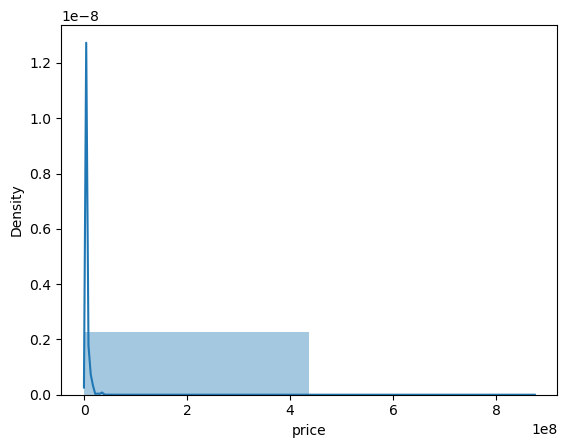

In [28]:
# Checking for extreme values
sns.distplot(df['price'], bins=2)

## Section 3: Data Prep for Regression Analysis

To try and determine which variable has the largest impact on price we will make several charts and see if a pattern emerges.

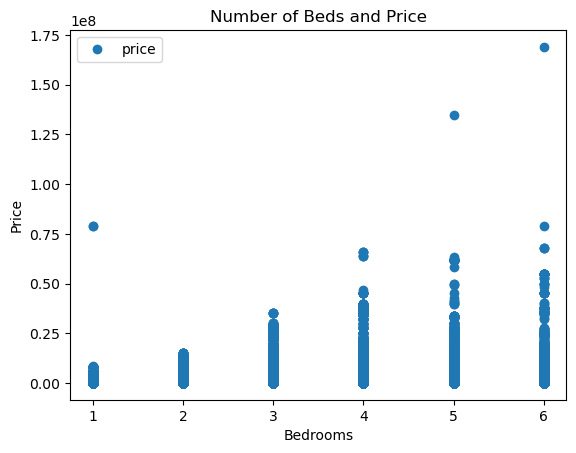

In [38]:
# Create a scatterplot to see how # of beds impacts price

df.plot(x = 'bed', y='price',style='o')
plt.title('Number of Beds and Price')  
plt.xlabel('Bedrooms')  
plt.ylabel('Price')  
plt.show()

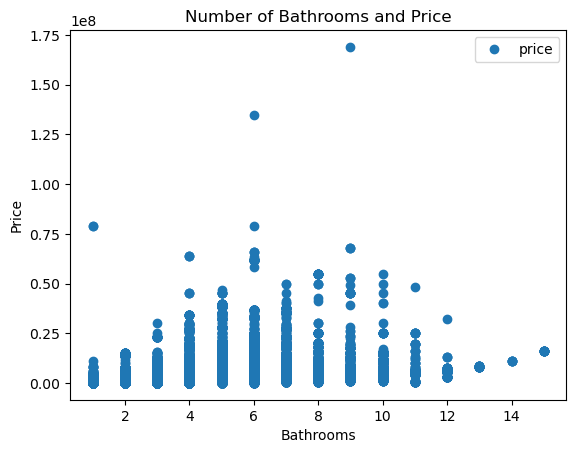

In [39]:
# Create a scatterplot to see how # of bathrooms impacts price

df.plot(x = 'bath', y='price',style='o')
plt.title('Number of Bathrooms and Price')  
plt.xlabel('Bathrooms')  
plt.ylabel('Price')  
plt.show()

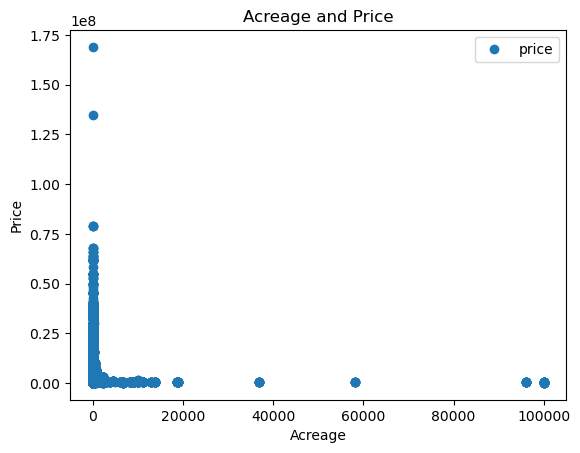

In [41]:
# Create a scatterplot to see how acreage impacts price

df.plot(x = 'acre_lot', y='price',style='o')
plt.title('Acreage and Price')  
plt.xlabel('Acreage')  
plt.ylabel('Price')  
plt.show()

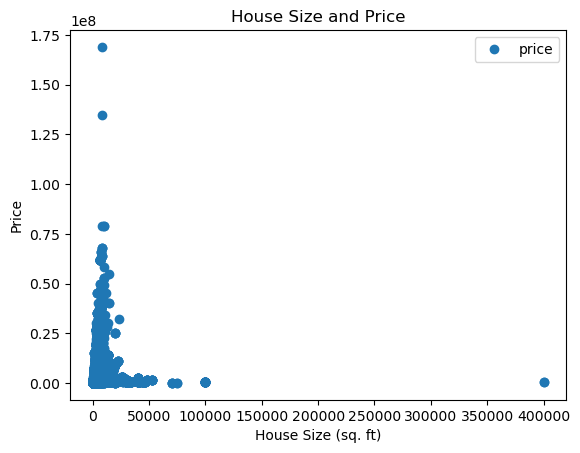

In [43]:
# Creating a scatterplot to see how house size impacts price

df.plot(x = 'house_size', y='price',style='o')
plt.title('House Size and Price')  
plt.xlabel('House Size (sq. ft)')  
plt.ylabel('Price')  
plt.show()

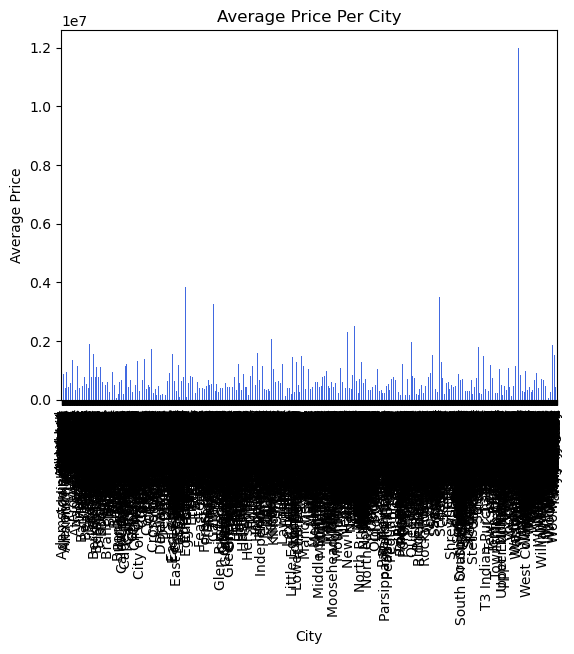

In [54]:
# Finally, a barchart to see if being in a city impacts price

city_price_mean = df.groupby('city').agg({'price' : ['mean']})
city_price_mean.plot(kind = 'bar', color = 'royalblue', legend = None)
plt.title('Average Price Per City')
plt.ylabel('Average Price')
plt.xlabel('City')
plt.show()

Based on these charts we can see that house size and acreage don't seem to impact the price of the house, whereas the amount of bathrooms and bedrooms do. The location also definitely affects the price, as the above chart shows.

However, let's focus on the number of bedrooms and bathrooms for the regression analysis, but since there are null values for bathrooms we will have to stick with bedrooms for now.

In [66]:
# Creating arrays to test variable relations
X = df['bed'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [67]:
X

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [3.],
       [3.]])

In [68]:
y

array([[180000.],
       [169900.],
       [242000.],
       ...,
       [299000.],
       [449000.],
       [850000.]])

In [70]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [71]:
# Create the regression object
regression = LinearRegression()

In [72]:
# Fitting the regression into the training sets
regression.fit(X_train, y_train)

LinearRegression()

In [73]:
# Predicting the values of y using X
y_predicted = regression.predict(X_test)

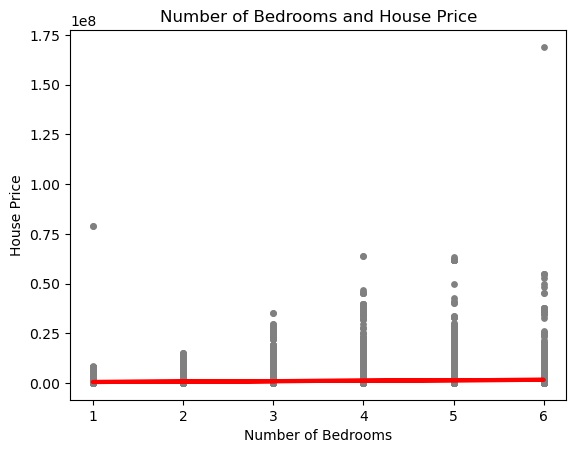

In [74]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of Bedrooms and House Price')
plot_test.xlabel('Number of Bedrooms')
plot_test.ylabel('House Price')
plot_test.show()

Based on the chart it appears that there is either no slope, or a very slight one. So let's check the statistics to see if there is a pattern.

In [76]:
# Creating objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [77]:
# Checking the stats
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[219503.97830625]]
Mean squared error:  3307702843496.4277
R2 score:  0.024169423898748654


Looks like the model did a poor job of predicting the data...

In [78]:
# Let's look at the raw numbers
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4999900.0,9.003925e+05
1,160000.0,6.808885e+05
2,995000.0,6.808885e+05
3,479900.0,9.003925e+05
4,175000.0,6.808885e+05
5,299900.0,6.808885e+05
6,335000.0,4.613845e+05
7,135000.0,6.808885e+05
8,515000.0,1.119896e+06
9,147500.0,6.808885e+05


In [79]:
# Let's see how well the test set performed
y_predicted_train = regression.predict(X_train)
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[219503.97830625]]
Mean squared error:  3039427062180.7983
R2 score:  0.02533317100081578


The test and training sets have very similar results, so at least we did not overtrain the test data.

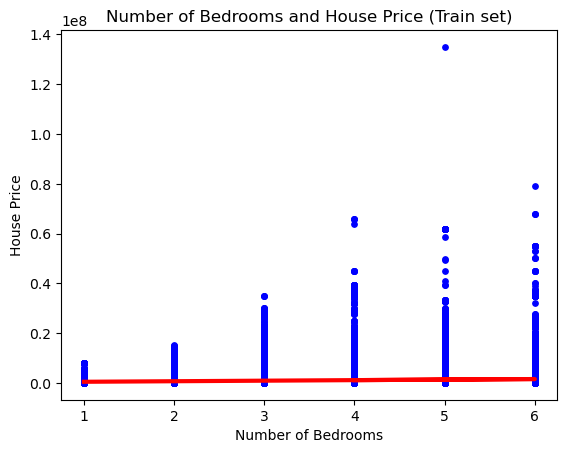

In [82]:
# Visualizing the training set results
plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of Bedrooms and House Price (Train set)')
plot_test.xlabel('Number of Bedrooms')
plot_test.ylabel('House Price')
plot_test.show()

No discernable change between the testing and training sets.

## Section 5: Thoughts on Model Performance

With this data it is safe to say that the number of bedrooms has almost no impact on the price of the house. Since the 'bath' column still has Null values we cannot test this, but I feel confident that it would have similar results.

This leads me to believe that the hypothesis that the size of the house (ie. the number of bathroom and bedrooms) does not have an impact on price. Based on the earlier chart of city and housing prices we do see that where the house is located appears to have an impact on the price.

Likely this means that the old realtor saying of "location, location, location" may hold more truth, that the location of the property is the true determinate of price.

## Section 6: Saving the Data

In [84]:
# Saving the cleaned data
df.to_csv(os.path.join(path, 'Project Docs', '02 Data', 'Prepared Data', 'cleaned_house_data.csv'))